<a href="https://colab.research.google.com/github/sudar-coder321/Second-Hand_Automobile_NewPrice_Prediction/blob/main/Second_Hand_Automobile_Price_Prediction_ML%26DM_Project_Group_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Second_Hand_Price_Prediction_ML&DM_Project_Group_8


## (i) Importing Necessary Libraries/Utilities and observing basic features from Dataset

##### **Importing Libraries**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from scipy import stats
from sklearn import preprocessing
import copy 

#### Loading the dataset

##### This dataset has been split into train and test dataset before preprocessing itself

In [134]:
shcp_train_data = pd.read_csv('Data_Train.csv') # to read csv

In [135]:
shcp_train_copy = copy.copy(shcp_train_data)

In [136]:
print(shcp_train_copy)

                                  Name    Location  ...  New_Price  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...        NaN   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...        NaN  12.50
2                         Honda Jazz V     Chennai  ...  8.61 Lakh   4.50
3                    Maruti Ertiga VDI     Chennai  ...        NaN   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...        NaN  17.74
...                                ...         ...  ...        ...    ...
6014                  Maruti Swift VDI       Delhi  ...  7.88 Lakh   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...        NaN   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...        NaN   2.90
6017                Maruti Wagon R VXI     Kolkata  ...        NaN   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...        NaN   2.50

[6019 rows x 13 columns]


In [137]:
shcp_test_data = pd.read_csv('Data_Test.csv') # to read csv

**Note:-** This data was split as train and test manually before preprocessing because the there are a lot of target values missing( due to it being a New price in the market)

#### Train Data

In [138]:
print(shcp_train_data)

                                  Name    Location  ...  New_Price  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...        NaN   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...        NaN  12.50
2                         Honda Jazz V     Chennai  ...  8.61 Lakh   4.50
3                    Maruti Ertiga VDI     Chennai  ...        NaN   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...        NaN  17.74
...                                ...         ...  ...        ...    ...
6014                  Maruti Swift VDI       Delhi  ...  7.88 Lakh   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...        NaN   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...        NaN   2.90
6017                Maruti Wagon R VXI     Kolkata  ...        NaN   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...        NaN   2.50

[6019 rows x 13 columns]


In [139]:
shcp_train_data.shape

(6019, 13)

#### Test Data

In [140]:
print(shcp_test_data)

                                                   Name  ...   New_Price
0                               Maruti Alto K10 LXI CNG  ...         NaN
1                         Maruti Alto 800 2016-2019 LXI  ...         NaN
2             Toyota Innova Crysta Touring Sport 2.4 MT  ...  25.27 Lakh
3                                  Toyota Etios Liva GD  ...         NaN
4                                     Hyundai i20 Magna  ...         NaN
...                                                 ...  ...         ...
1229                  Volkswagen Vento Diesel Trendline  ...         NaN
1230                             Volkswagen Polo GT TSI  ...         NaN
1231                             Nissan Micra Diesel XV  ...         NaN
1232                             Volkswagen Polo GT TSI  ...         NaN
1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...  ...         NaN

[1234 rows x 12 columns]


In [141]:
shcp_test_data.shape

(1234, 12)

In [142]:
print(shcp_train_data.head())

                               Name    Location  Year  ...  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010  ...    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011  ...    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012  ...    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...    5.0        NaN  17.74

[5 rows x 13 columns]


In [143]:
print(shcp_train_data.tail())

                          Name   Location  Year  ...  Seats  New_Price Price
6014          Maruti Swift VDI      Delhi  2014  ...    5.0  7.88 Lakh  4.75
6015  Hyundai Xcent 1.1 CRDi S     Jaipur  2015  ...    5.0        NaN  4.00
6016     Mahindra Xylo D4 BSIV     Jaipur  2012  ...    8.0        NaN  2.90
6017        Maruti Wagon R VXI    Kolkata  2013  ...    5.0        NaN  2.65
6018     Chevrolet Beat Diesel  Hyderabad  2011  ...    5.0        NaN  2.50

[5 rows x 13 columns]


In [144]:
print(len(shcp_train_data))

6019


In [145]:
shcp_train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [146]:
len(shcp_train_data.columns)

13

In [147]:
shcp_train_data.shape

(6019, 13)

#### Number of Records

In [148]:
print("No of Records(rows) ",shcp_train_data.shape[0])

No of Records(rows)  6019


#### Number of Attributes

In [149]:
print("No of Attributes(columns) ",shcp_train_data.shape[1])

No of Attributes(columns)  13


In [150]:
list(shcp_train_data.columns)

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [151]:
print("The attributes present in the Dataset are \n")
shcp_list = list(shcp_train_data.columns)
for item in shcp_list:
  print(item)

The attributes present in the Dataset are 

Name
Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
New_Price
Price


In [152]:
shcp_train_data = shcp_train_data.loc[:, ~shcp_train_data.columns.str.contains('^Unnamed')]

In [153]:
shcp_train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


## (ii) Preprocessing Steps 

Checking Whether which of the values are NULL

In [154]:
null_status = shcp_train_data.isnull() # null_status is a dataframe to indicate places where null values are present

In [155]:
null_status

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,False,False,False,False,False,False,False,False,False,False,False,False,False
6015,False,False,False,False,False,False,False,False,False,False,False,True,False
6016,False,False,False,False,False,False,False,False,False,False,False,True,False
6017,False,False,False,False,False,False,False,False,False,False,False,True,False


In [156]:
len(shcp_train_data.isnull())

6019

In [157]:
shcp_train_data.isnull().sum(axis=0)

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [158]:
print("Types of the columns are")
for item in shcp_list:
  print(type(item))

Types of the columns are
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [159]:
print("Attributes which are NULL are \n")
for col in shcp_list:
  if(shcp_train_data[col].isnull().any() == True):
    print(col)


Attributes which are NULL are 

Mileage
Engine
Power
Seats
New_Price


Total Number of Non NULLs

In [160]:
shcp_train_data.isnull().sum().sum()

5311

In [161]:
shcp_train_data.isnull().sum(axis=1)

0       1
1       1
2       0
3       1
4       1
       ..
6014    0
6015    1
6016    1
6017    1
6018    1
Length: 6019, dtype: int64

In [162]:
shcp_test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [163]:
print(type(shcp_train_data.isnull()))

<class 'pandas.core.frame.DataFrame'>


In [164]:
shcp_train_data.axes

[RangeIndex(start=0, stop=6019, step=1),
 Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'New_Price', 'Price'],
       dtype='object')]

In [165]:
shcp_train_data.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [166]:
shcp_test_data.nunique()

Name                 768
Location              11
Year                  20
Kilometers_Driven    755
Fuel_Type              4
Transmission           2
Owner_Type             4
Mileage              301
Engine               104
Power                249
Seats                  7
New_Price            162
dtype: int64

### Printing Data Types of *Columns*

In [167]:
for i in range(len(shcp_train_data.columns)):
  print(" Data: ",shcp_list[i] ," Type: ",shcp_train_data[shcp_list[i]].dtypes) # shcp_list --> Columns list
                                                                                # shcp_train_data --> Original Dataframe
  print()

 Data:  Name  Type:  object

 Data:  Location  Type:  object

 Data:  Year  Type:  int64

 Data:  Kilometers_Driven  Type:  int64

 Data:  Fuel_Type  Type:  object

 Data:  Transmission  Type:  object

 Data:  Owner_Type  Type:  object

 Data:  Mileage  Type:  object

 Data:  Engine  Type:  object

 Data:  Power  Type:  object

 Data:  Seats  Type:  float64

 Data:  New_Price  Type:  object

 Data:  Price  Type:  float64



#### (i) Train_Attributes

In [168]:
shcp_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


#### (ii) Test Attributes

In [169]:
shcp_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


#### Finding numerical attributes in the data set

In [170]:
shcp_numerical = shcp_train_data.select_dtypes(include = 'number', exclude = None)

In [171]:
print(shcp_numerical)

      Year  Kilometers_Driven  Seats  Price
0     2010              72000    5.0   1.75
1     2015              41000    5.0  12.50
2     2011              46000    5.0   4.50
3     2012              87000    7.0   6.00
4     2013              40670    5.0  17.74
...    ...                ...    ...    ...
6014  2014              27365    5.0   4.75
6015  2015             100000    5.0   4.00
6016  2012              55000    8.0   2.90
6017  2013              46000    5.0   2.65
6018  2011              47000    5.0   2.50

[6019 rows x 4 columns]


**Conclusion -** It proves to be inconsistent because some of the numerical attributes have not been recognised

#### Finding categorical attributes in the data set

In [172]:
shcp_categorical = pd.concat([shcp_train_data,shcp_numerical]).drop_duplicates(keep=False)

In [173]:
print(shcp_categorical)

                                  Name    Location  ...  New_Price  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...        NaN   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...        NaN  12.50
2                         Honda Jazz V     Chennai  ...  8.61 Lakh   4.50
3                    Maruti Ertiga VDI     Chennai  ...        NaN   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...        NaN  17.74
...                                ...         ...  ...        ...    ...
6014                               NaN         NaN  ...        NaN   4.75
6015                               NaN         NaN  ...        NaN   4.00
6016                               NaN         NaN  ...        NaN   2.90
6017                               NaN         NaN  ...        NaN   2.65
6018                               NaN         NaN  ...        NaN   2.50

[11931 rows x 13 columns]


**Conclusion -** It proves to be inconsistent because some of the categorical attributes have been recognised wrongly

In [174]:
shcp_train_data['Mileage'].dtype

dtype('O')

In [175]:
shcp_train_data['Mileage'].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [176]:
shcp_train_data['Mileage'].tail()

6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, dtype: object

In [177]:
shcp_train_data['New_Price'].isnull().values.any()

True

### The Rows which contain NULL values

In [178]:
shcp_train_data.loc[shcp_train_data['New_Price'].isnull() == True] 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,4.83
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [179]:
print("Number of Mileage NULL attributes",len(shcp_train_data.loc[shcp_train_data['Mileage'].isnull() == True])) 

Number of Mileage NULL attributes 2


In [180]:
df_temp = shcp_train_data.loc[shcp_train_data['Mileage'].isnull() == True]

In [181]:
df_temp

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [182]:
temp_list = df_temp['Mileage']

In [183]:
temp_list

4446    NaN
4904    NaN
Name: Mileage, dtype: object

In [184]:
df_temp_notnull = shcp_train_data.loc[shcp_train_data['Mileage'].isnull() == False]

In [185]:
df_temp_notnull

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [186]:
print("Number of NON NULL attributes",len(df_temp_notnull)) 

Number of NON NULL attributes 6017


In [187]:
print("Number of New_Price NULL attributes",len(shcp_train_data.loc[shcp_train_data['New_Price'].isnull() == True])) 

Number of New_Price NULL attributes 5195


In [188]:
inconsistent_mileage = df_temp_notnull.loc[df_temp_notnull['Mileage'].str.contains("km/kg", case=False)]

In [189]:
inconsistent_mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


In [190]:
temp_list1 = inconsistent_mileage['Mileage']

In [191]:
temp_list1

0        26.6 km/kg
5        21.1 km/kg
127      26.6 km/kg
328      26.3 km/kg
440      15.1 km/kg
           ...     
5876     17.5 km/kg
5881     26.6 km/kg
5902     26.2 km/kg
5935    32.26 km/kg
5997     26.2 km/kg
Name: Mileage, Length: 66, dtype: object

In [192]:
print("Number of incosistent records in Mileage Column ",len(inconsistent_mileage))

Number of incosistent records in Mileage Column  66


### Making Attribute Values Consistent

In [193]:
inconsistent_mileage['Mileage'] = inconsistent_mileage['Mileage'].str.replace(r'km/kg', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
inconsistent_mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,3.70
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2,998 CC,58.2 bhp,5.0,NaN,2.25
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26,998 CC,58.2 bhp,4.0,NaN,3.10


In [195]:
inconsistent_mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 5997
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               66 non-null     object 
 1   Location           66 non-null     object 
 2   Year               66 non-null     int64  
 3   Kilometers_Driven  66 non-null     int64  
 4   Fuel_Type          66 non-null     object 
 5   Transmission       66 non-null     object 
 6   Owner_Type         66 non-null     object 
 7   Mileage            66 non-null     object 
 8   Engine             66 non-null     object 
 9   Power              66 non-null     object 
 10  Seats              66 non-null     float64
 11  New_Price          9 non-null      object 
 12  Price              66 non-null     float64
dtypes: float64(2), int64(2), object(9)
memory usage: 7.2+ KB


In [196]:
inconsistent_mileage['Mileage'] = inconsistent_mileage['Mileage'].str.replace(r'km/kg', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
df_temp_notnull['Mileage'] = df_temp_notnull['Mileage'].str.replace(r'km/kg','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
df_temp_notnull['Mileage'] = df_temp_notnull['Mileage'].str.replace(r'kmpl','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
df_temp_notnull

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.0,NaN,2.65


In [200]:
df_temp_notnull['Engine'] = df_temp_notnull['Engine'].str.replace(r'CC','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [201]:
df_temp_notnull['Engine'].isnull().values.any()

True

In [202]:
df_temp_notnull['Engine'].isnull().values

array([False, False, False, ..., False, False, False])

## Finding Records where the attributes Mileage, Engine and Power are NaN (Incosistent)

In [203]:
df_temp_null = df_temp_notnull.loc[df_temp_notnull['Engine'].isnull() == True]

In [204]:
print("Number of records which are still NULL are ",len(df_temp_null))

Number of records which are still NULL are  36


In [205]:
df_temp_no_null = df_temp_notnull.loc[df_temp_notnull['Engine'].isnull() == False]

In [206]:
df_temp_no_null

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1 bhp,5.0,NaN,2.65


In [207]:
df_temp_no_null['Power'] = df_temp_notnull['Power'].str.replace(r'bhp','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
df_temp_notnull

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1 bhp,5.0,NaN,2.65


In [209]:
df_temp_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Location           5981 non-null   object 
 2   Year               5981 non-null   int64  
 3   Kilometers_Driven  5981 non-null   int64  
 4   Fuel_Type          5981 non-null   object 
 5   Transmission       5981 non-null   object 
 6   Owner_Type         5981 non-null   object 
 7   Mileage            5981 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5981 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 654.2+ KB


In [210]:
print("Length of shcp_list is",n)

Length of shcp_list is 13


In [211]:
datatypes_type = type(df_temp_notnull.dtypes['Power'])

In [212]:
print("The type of the datatypes is ",datatypes_type)

The type of the datatypes is  <class 'numpy.dtype'>


In [213]:
print("Datatypes is ",datatypes_type)

Datatypes is  <class 'numpy.dtype'>


In [214]:
df_temp_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              6017 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 818.1+ KB


In [215]:
print("Number of Varities/Brand Models of cars available ",len(list(df_temp_notnull['Name'].values)))

Number of Varities/Brand Models of cars available  6017


In [216]:
list(df_temp_notnull['Name'].values)

['Maruti Wagon R LXI CNG',
 'Hyundai Creta 1.6 CRDi SX Option',
 'Honda Jazz V',
 'Maruti Ertiga VDI',
 'Audi A4 New 2.0 TDI Multitronic',
 'Hyundai EON LPG Era Plus Option',
 'Nissan Micra Diesel XV',
 'Toyota Innova Crysta 2.8 GX AT 8S',
 'Volkswagen Vento Diesel Comfortline',
 'Tata Indica Vista Quadrajet LS',
 'Maruti Ciaz Zeta',
 'Honda City 1.5 V AT Sunroof',
 'Maruti Swift VDI BSIV',
 'Land Rover Range Rover 2.2L Pure',
 'Land Rover Freelander 2 TD4 SE',
 'Mitsubishi Pajero Sport 4X4',
 'Honda Amaze S i-Dtech',
 'Maruti Swift DDiS VDI',
 'Renault Duster 85PS Diesel RxL Plus',
 'Mercedes-Benz New C-Class C 220 CDI BE Avantgare',
 'BMW 3 Series 320d',
 'Maruti S Cross DDiS 200 Alpha',
 'Audi A6 2011-2015 35 TFSI Technology',
 'Hyundai i20 1.2 Magna',
 'Volkswagen Vento Petrol Highline AT',
 'Honda City Corporate Edition',
 'Nissan Micra Diesel XV',
 'Maruti Alto K10 2010-2014 VXI',
 'Honda WRV i-VTEC VX',
 'Toyota Innova 2.5 V Diesel 7-seater',
 'Renault Duster 110PS Diesel RxZ Pa

In [217]:
df_temp_notnull['Name'] = df_temp_notnull['Name'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
df_temp_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              6017 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 818.1+ KB


In [219]:
mean_value = {}

In [220]:
temp_list2 = list(df_temp_notnull)

In [221]:
n = len(shcp_list)

In [222]:
print("n is ",n)

n is  13


In [223]:
shcp_numerical_notnull = df_temp_notnull.select_dtypes(include = ['int64','float64'], exclude = None)

In [224]:
shcp_numerical_notnull

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74
...,...,...,...,...
6014,2014,27365,5.0,4.75
6015,2015,100000,5.0,4.00
6016,2012,55000,8.0,2.90
6017,2013,46000,5.0,2.65


In [225]:
shcp_numerical_temp = shcp_train_data.select_dtypes(include = 'number', exclude = None)

In [226]:
shcp_train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [227]:
shcp_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [228]:
shcp_train_data.nunique

<bound method DataFrame.nunique of                                   Name    Location  ...  New_Price  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...        NaN   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...        NaN  12.50
2                         Honda Jazz V     Chennai  ...  8.61 Lakh   4.50
3                    Maruti Ertiga VDI     Chennai  ...        NaN   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...        NaN  17.74
...                                ...         ...  ...        ...    ...
6014                  Maruti Swift VDI       Delhi  ...  7.88 Lakh   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...        NaN   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...        NaN   2.90
6017                Maruti Wagon R VXI     Kolkata  ...        NaN   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...        NaN   2.50

[6019 rows x 13 columns]>

In [229]:
print(shcp_categorical)

                                  Name    Location  ...  New_Price  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...        NaN   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...        NaN  12.50
2                         Honda Jazz V     Chennai  ...  8.61 Lakh   4.50
3                    Maruti Ertiga VDI     Chennai  ...        NaN   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...        NaN  17.74
...                                ...         ...  ...        ...    ...
6014                               NaN         NaN  ...        NaN   4.75
6015                               NaN         NaN  ...        NaN   4.00
6016                               NaN         NaN  ...        NaN   2.90
6017                               NaN         NaN  ...        NaN   2.65
6018                               NaN         NaN  ...        NaN   2.50

[11931 rows x 13 columns]


In [230]:
shcp_numerical.drop(['Year'], axis = 1)

,Kilometers_Driven,Seats,Price
0,72000,5.0,1.75
1,41000,5.0,12.50
2,46000,5.0,4.50
3,87000,7.0,6.00
4,40670,5.0,17.74
...,...,...,...
6014,27365,5.0,4.75
6015,100000,5.0,4.00
6016,55000,8.0,2.90
6017,46000,5.0,2.65


In [231]:
df_temp_no_null['New_Price'] = df_temp_no_null['New_Price'].str.replace(r' Lakh', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
df_temp_no_null.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [233]:
df_temp_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Location           5981 non-null   object 
 2   Year               5981 non-null   int64  
 3   Kilometers_Driven  5981 non-null   int64  
 4   Fuel_Type          5981 non-null   object 
 5   Transmission       5981 non-null   object 
 6   Owner_Type         5981 non-null   object 
 7   Mileage            5981 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5981 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 654.2+ KB


### Value Counts of each of the Feature Attirbutes

In [234]:
df_temp_no_null.value_counts()

Name                                 Location   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  Power    Seats  New_Price  Price
Volvo V40 D3 R Design                Hyderabad  2015  38000              Diesel     Automatic     Second      16.8     1969    150      5.0    37.9       24.00    1
Hyundai Xcent 1.2 CRDi S             Kolkata    2016  26000              Diesel     Manual        First       25.4     1186    73.97    5.0    8.23       5.00     1
Jaguar XE 2.0L Diesel Prestige       Delhi      2018  1000               Diesel     Automatic     First       13.6     1999    177      5.0    52.77      40.00    1
Isuzu MUX 4WD                        Jaipur     2017  34429              Diesel     Automatic     First       13.8     2999    174.57   7.0    33.68      20.00    1
Hyundai i20 Active SX Petrol         Jaipur     2017  40250              Petrol     Manual        First       17.19    1197    81.86    5.0    9.74       6.90     1
               

In [235]:
for col in shcp_list:
  print(df_temp_no_null[col].value_counts(),end="\n\n\n")

Mahindra XUV500 W8 2WD                              49
Maruti Swift VDI                                    45
Maruti Swift Dzire VDI                              34
Honda City 1.5 S MT                                 34
Maruti Swift VDI BSIV                               31
                                                    ..
Skoda Yeti Elegance 4X2                              1
Hyundai Elantra CRDi                                 1
Mahindra XUV500 W7                                   1
BMW 5 Series 530d Highline Sedan                     1
Mitsubishi Pajero Sport 4X2 AT DualTone BlackTop     1
Name: Name, Length: 1858, dtype: int64


Mumbai        785
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       531
Chennai       492
Jaipur        411
Bangalore     354
Ahmedabad     223
Name: Location, dtype: int64


2014    795
2015    742
2016    740
2013    648
2017    586
2012    573
2011    461
2010    340
2018    298
2009    196
2008 

## (iii) Data Visualization

### (a) Polynomial Scatter Plot (For Analysing Trend)

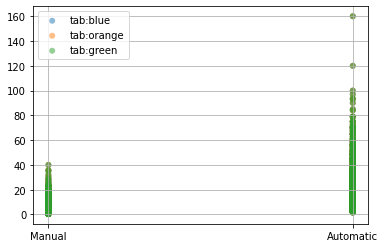

In [370]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    ax.scatter(list(df_temp_no_null['Transmission']),list(df_temp_no_null['Price']), c=color, label=color,
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.show()

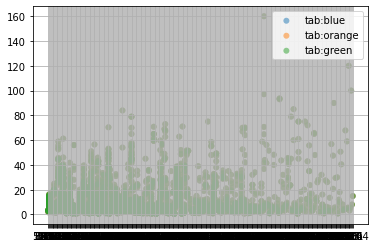

In [371]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    ax.scatter(list(df_temp_no_null['Power']),list(df_temp_no_null['Price']), c=color, label=color,
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.show()

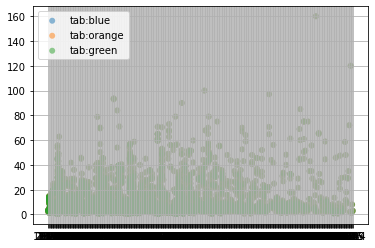

In [372]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    ax.scatter(list(df_temp_no_null['Mileage']),list(df_temp_no_null['Price']), c=color, label=color,
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.show()

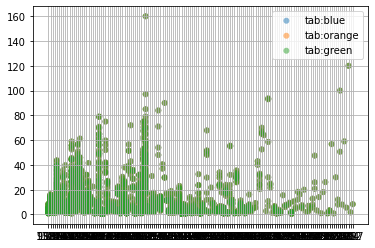

In [375]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    ax.scatter(list(df_temp_no_null['Engine']),list(df_temp_no_null['Price']), c=color, label=color,
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.show()

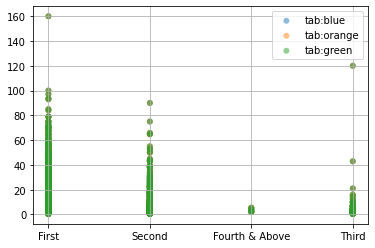

In [376]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    ax.scatter(list(df_temp_no_null['Owner_Type']),list(df_temp_no_null['Price']), c=color, label=color,
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.show()

## Understanding the Correlation of all the attributes with each other

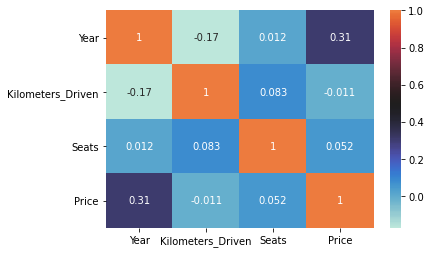

In [237]:
ax = sns.heatmap(df_temp_no_null.corr(), center = 0.5 , annot=True)

In [ ]:
#Kendall Coefficient

## (iv) Data Transformation 

### Data types before Applying Label Encoding

In [342]:
df_temp_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Location           5981 non-null   object 
 2   Year               5981 non-null   int64  
 3   Kilometers_Driven  5981 non-null   int64  
 4   Fuel_Type          5981 non-null   object 
 5   Transmission       5981 non-null   object 
 6   Owner_Type         5981 non-null   object 
 7   Mileage            5981 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5981 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 814.2+ KB


In [343]:
shcp_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             6019 non-null   object 
 9   Power              6019 non-null   object 
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [344]:
df_temp_numerical = copy.copy(df_temp_no_null)

In [345]:
df_temp_numerical.drop(['Name', 'Location' , 'Year' , 'Kilometers_Driven' ,'Fuel_Type' ,'Transmission','Owner_Type','New_Price'], axis = 1, inplace = True) 

In [346]:
df_temp_numerical.head()

,Mileage,Engine,Power,Seats,Price
0,26.6,998,58.16,5.0,1.75
1,19.67,1582,126.2,5.0,12.50
2,18.2,1199,88.7,5.0,4.50
3,20.77,1248,88.76,7.0,6.00
4,15.2,1968,140.8,5.0,17.74


In [347]:
numerical_cols = list(df_temp_numerical.columns)

In [348]:
numerical_cols

['Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [349]:
df_temp_categorical = copy.copy(df_temp_no_null)

In [350]:
df_temp_categorical.drop(['Mileage','Engine','Power','Seats','Price','New_Price','Name','Location','Year','Kilometers_Driven'], axis = 1, inplace = True)

In [351]:
df_temp_categorical

,Fuel_Type,Transmission,Owner_Type
0,CNG,Manual,First
1,Diesel,Manual,First
2,Petrol,Manual,First
3,Diesel,Manual,First
4,Diesel,Automatic,Second
...,...,...,...
6014,Diesel,Manual,First
6015,Diesel,Manual,First
6016,Diesel,Manual,Second
6017,Petrol,Manual,First


In [352]:
categorical_cols = list(df_temp_categorical.columns)

In [353]:
categorical_cols

['Fuel_Type', 'Transmission', 'Owner_Type']

### **Applying Label Encoding**

In [354]:
le=preprocessing.LabelEncoder()
for i in categorical_cols:
    df_temp_categorical[i]=le.fit_transform(df_temp_categorical[i])

In [355]:
df_temp_categorical.head()

,Fuel_Type,Transmission,Owner_Type
0,0,1,0
1,1,1,0
2,3,1,0
3,1,1,0
4,1,0,2


In [356]:
df_temp_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Fuel_Type     5981 non-null   int64
 1   Transmission  5981 non-null   int64
 2   Owner_Type    5981 non-null   int64
dtypes: int64(3)
memory usage: 346.9 KB


In [357]:
df_temp_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  5981 non-null   object 
 1   Engine   5981 non-null   object 
 2   Power    5981 non-null   object 
 3   Seats    5975 non-null   float64
 4   Price    5981 non-null   float64
dtypes: float64(2), object(3)
memory usage: 440.4+ KB


In [358]:
df_temp_numerical['Mileage'][len(df_temp_numerical)-1] = float(df_temp_numerical['Mileage'][len(df_temp_numerical)-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [359]:
print(df_temp_numerical['Mileage'][len(df_temp_numerical)-1])

18.5


In [360]:
df_temp_numerical['Mileage'] = pd.to_numeric(df_temp_numerical['Mileage'], errors='coerce')
df_temp_numerical['Engine'] = pd.to_numeric(df_temp_numerical['Engine'], errors='coerce')
df_temp_numerical['Power'] = pd.to_numeric(df_temp_numerical['Power'], errors='coerce')
df_temp_numerical['Price'] = pd.to_numeric(df_temp_numerical['Power'], errors='coerce')

In [325]:
df_temp_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  5981 non-null   float64
 1   Engine   5981 non-null   int64  
 2   Power    5874 non-null   float64
 3   Seats    5975 non-null   float64
 4   Price    5874 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 440.4 KB


In [361]:
min_max_sca=preprocessing.MinMaxScaler()
min_max_sca.fit(df_temp_numerical)
df_temp_numerical_ndarr=min_max_sca.transform(df_temp_numerical)

In [362]:
df_temp_numerical_ndarr

array([[0.79308289, 0.06959434, 0.04556866, 0.5       , 0.04556866],
       [0.58646392, 0.17826572, 0.17497147, 0.5       , 0.17497147],
       [0.54263566, 0.10699665, 0.10365158, 0.5       , 0.10365158],
       ...,
       [0.41741205, 0.34871604, 0.14796501, 0.8       , 0.14796501],
       [0.56350626, 0.06959434, 0.06257132, 0.5       , 0.06257132],
       [0.75849732, 0.05805731, 0.04450361, 0.5       , 0.04450361]])

In [364]:
index = ['Mileage', 'Power' ,'Engine','Seats']

In [365]:
df_temp_final = pd.DataFrame(df_temp_numerical_ndarr)

In [366]:
df_temp_final.head()

,0,1,2,3,4
0,0.793083,0.069594,0.045569,0.5,0.045569
1,0.586464,0.178266,0.174971,0.5,0.174971
2,0.542636,0.106997,0.103652,0.5,0.103652
3,0.619261,0.116115,0.103766,0.7,0.103766
4,0.453190,0.250093,0.202739,0.5,0.202739


In [332]:
Mileage_mean = df_temp_final[0].mean()
Power_mean = df_temp_final[1].mean()
Engine_mean = df_temp_final[2].mean()
Seats_mean = df_temp_final[3].mean()

In [334]:
print("Mean of Mileages" , Mileage_mean)
print("Mean of Power" , Power_mean)
print("Mean of Engines" , Engine_mean)
print("Mean of Seats" , Seats_mean)

Mean of Mileages 0.5418981814505641
Mean of Power 0.1856170330223871
Mean of Engines 0.1503845624346846
Mean of Seats 0.5278828451882821


In [338]:
shcp_train_data["Mileage"].fillna(Mileage_mean, inplace = True)
shcp_train_data["Power"].fillna(Power_mean, inplace = True)
shcp_train_data["Engine"].fillna(Engine_mean, inplace = True)
shcp_train_data["Seats"].fillna(Seats_mean, inplace = True)

### Box Plot for analysing the number of Outliers in numerical data and where they are present

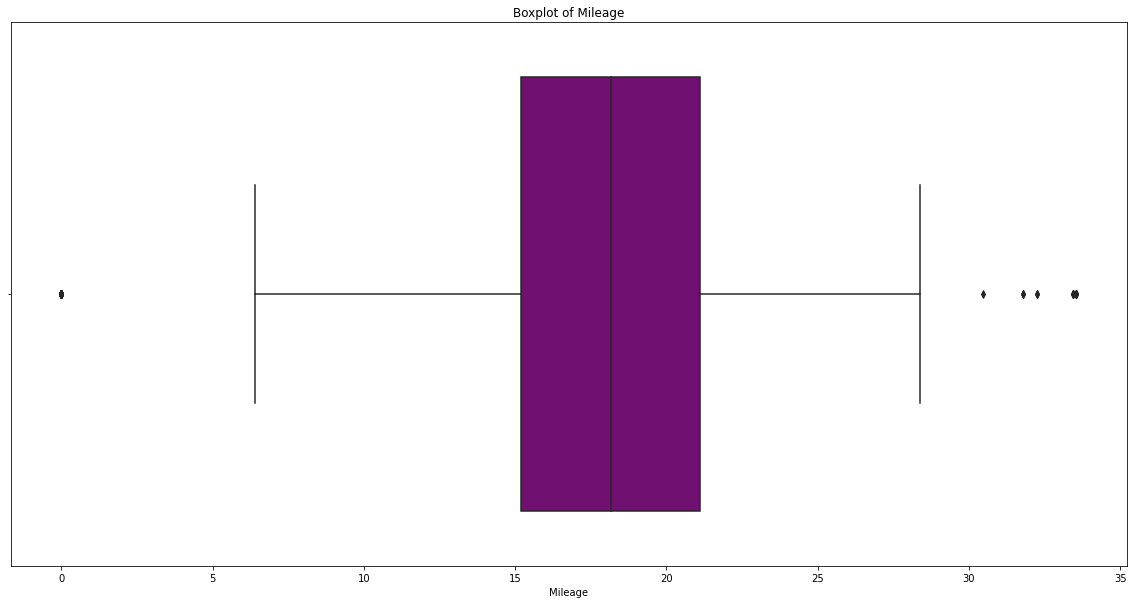

In [385]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Mileage')
sns.boxplot(data=df_temp_numerical, x='Mileage',color="purple")

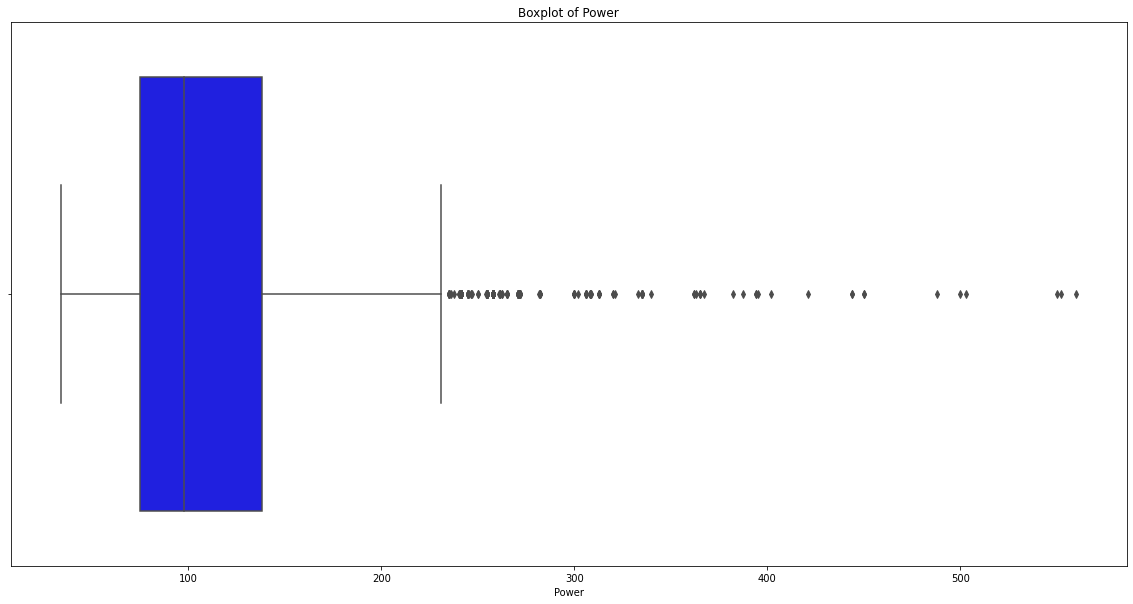

In [386]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Power')
sns.boxplot(data=df_temp_numerical, x='Power',color="blue")

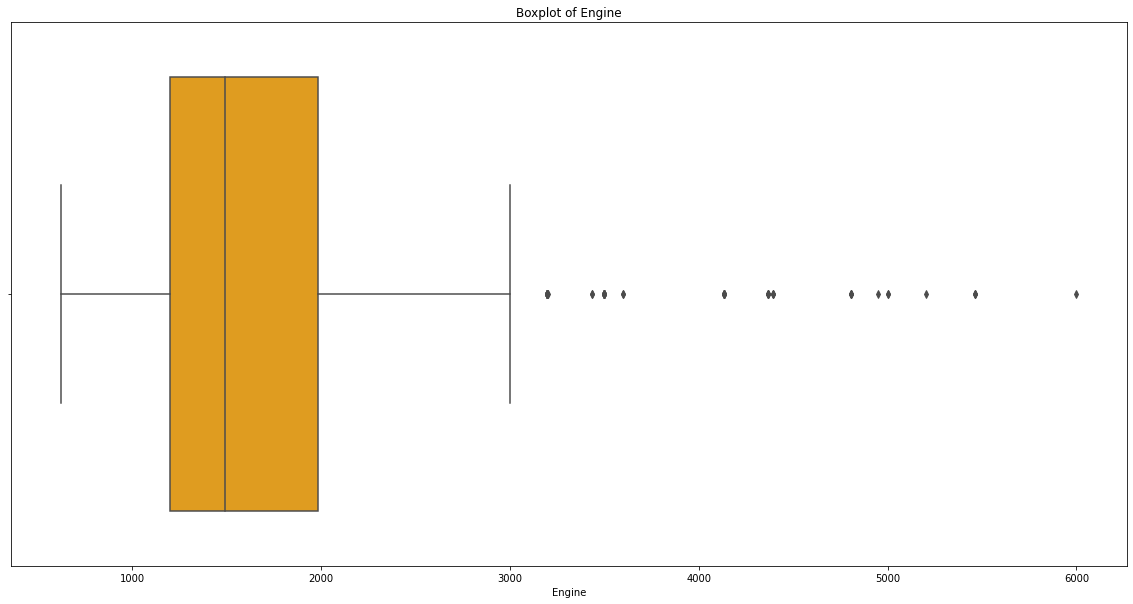

In [387]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Engine')
sns.boxplot(data=df_temp_numerical, x='Engine',color="orange")

### (b) Pair Plot

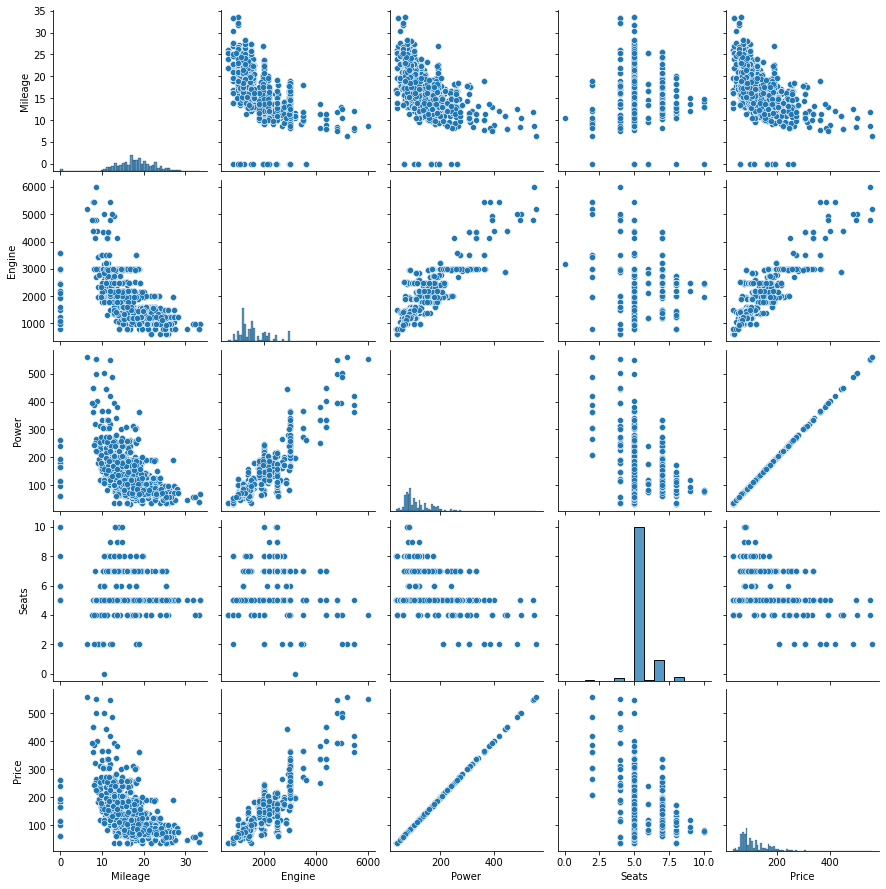

In [388]:
sns.pairplot(df_temp_numerical)

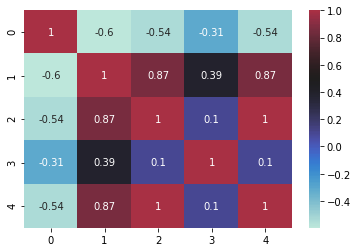

In [367]:
ax = sns.heatmap(df_temp_final.corr(), center = 0.5 , annot=True)